<a href="https://colab.research.google.com/github/Ofir-Manor/Long2/blob/master/311288203_316084623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> HW2 Major</h1>
<h1 align="center"> Algorithm Implementation and Basic Model Selection</h1>


>[Setting the Environment](#scrollTo=Kpg2UySJH5a3)

>[Preliminary: Data Loading](#scrollTo=ChGfAF2uIn-C)

>[Part 1: Basic model selection with k-Nearest Neighbors](#scrollTo=fe8cfb7a-a0f6-4365-a7ee-9266bbb3ff9c)

>>[Question 1](#scrollTo=86dab325-b0a6-4f9e-80d9-e5fde57dafd5)

>>[Question 2](#scrollTo=62dcc96a-1343-4958-8383-ec2421cfe9a8)

>>[Question 3](#scrollTo=f96064d6-97a1-4ac6-a8e3-db1798c0f02c)

>>[Question 4](#scrollTo=30019235-9df0-44b5-bdd4-68134a461b97)

>>[Question 5](#scrollTo=64ead7ae-c026-42f2-9d26-6cdf7bb17b26)

>>[Question 6](#scrollTo=570238ff-02f0-40ac-971b-ebe91f3f1a99)

>[Part 2: Decision trees](#scrollTo=3fa9b3bf-d5a3-4f3b-bd5b-fd9682aca9e8)

>>[Question 7](#scrollTo=7970df26-7197-4b96-b7e3-c2f0bb73ecc2)

>>[Question 8](#scrollTo=UCOb86dVX6Wh)

>>[Question 9](#scrollTo=eMOthCfDLnVn)

>[Part 3: Linear SVM and the Polynomial kernel](#scrollTo=sU0w6fPtLz4p)

>>[Question 10](#scrollTo=p7NvEd5TjeiM)

>>[Question 11](#scrollTo=8CX8wvr5sslW)

>>[Qeustion 12](#scrollTo=t_hRZkQP57zV)



# Setting the Environment

In [1]:
#@title Setting the Environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from typing import Union
params = {
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize' : 22,
    'axes.labelsize' : 20,
    'legend.fontsize': 18,
    'legend.title_fontsize': 22,
    'figure.titlesize': 24
 }
pylab.rcParams.update(params)

# Preliminary: Data Loading

In [2]:
#@title Loading the dataset and the code files:

# load all your python files:
!rm *.py
from google.colab import files
print("Please load all your python files as following:")
print("prepare.py,  visualize_clf.py,  SoftSVM.py,  verify_gradients.py.")
uploadedData = files.upload()
filename = list(uploadedData)[0]

# load the csv file:
!rm *.csv
from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load all your python files as following:
prepare.py,  visualize_clf.py,  SoftSVM.py,  verify_gradients.py.


Saving prepare.py to prepare.py
Saving verify_gradients.py to verify_gradients.py
Saving visualize_clf.py to visualize_clf.py
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [3]:
#@title Create DF and split it:

dataset = pd.DataFrame(pd.read_csv(filename))
from sklearn.model_selection import train_test_split
random_state = 3 + 23
train_raw, test_raw = train_test_split(dataset, test_size=0.2, random_state=random_state)

In [4]:
#@title Use `prepare` function:

from prepare import prepare_data
# Prepare training set according to itself
train = prepare_data(train_raw, train_raw)
# Prepare test set according to the raw training set
test = prepare_data(train_raw, test_raw)



---



---



---



# Part 1: Basic model selection with k-Nearest Neighbors

## Question 1

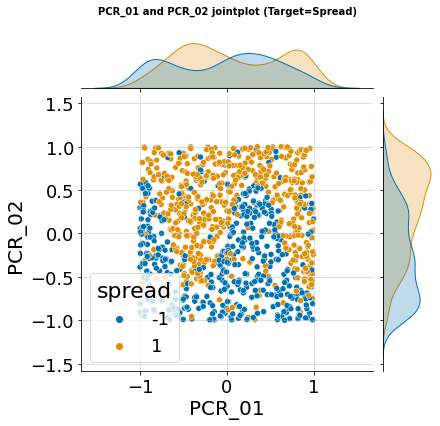

In [5]:
#@title Present jointplot for `PCR_01` vs `PCR_02`:

from sklearn.neighbors import KNeighborsClassifier
from visualize_clf import visualize_clf
train_mod = train.copy()[["PCR_01", "PCR_02", "spread"]]
test_mod = test.copy()[["PCR_01", "PCR_02", "spread"]]
g = sns.jointplot(x="PCR_01",
                  y="PCR_02",
                  data=train_mod,
                  hue='spread',
                  palette='colorblind')
g.fig.suptitle("PCR_01 and PCR_02 jointplot (Target=Spread)",
               fontsize='medium', fontweight='semibold')
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room
g.ax_joint.grid(alpha=0.5)

## Question 2

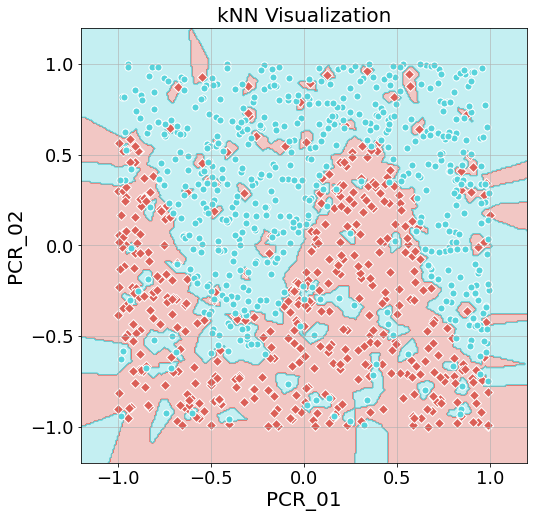

In [6]:
#@title Train a kNN model and visualize the decision regions:

train_mod_x = train_mod[["PCR_01", "PCR_02"]]
train_mod_y = train_mod["spread"]
kNN = KNeighborsClassifier(n_neighbors=1)
kNN.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN, X=train_mod_x,
              Y=train_mod_y, title="kNN Visualization",
              xlabel="PCR_01",
              ylabel="PCR_02")

## Question 3

In [7]:
#@title Find the best k for kNN model for predicting the `spread` class:

from sklearn.model_selection import cross_validate
k_list = list(range(1, 20, 2)) + list(range(20, 871, 85))
cv_train_mean = np.array([])
cv_val_mean = np.array([])
for k in k_list:
    kNN_cv = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(estimator=kNN_cv, X=train_mod_x,
                                y=train_mod_y, cv=8, return_train_score=True)
    cv_train_mean = np.append(cv_train_mean, np.array(cv_results['train_score']).mean())
    cv_val_mean = np.append(cv_val_mean, np.array(cv_results['test_score']).mean())


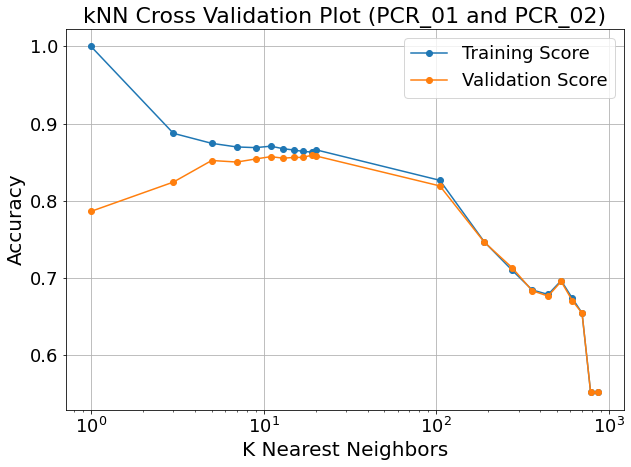

In [8]:
#@title plot a validation curve - of training and validation accuracies:

plt.figure(figsize=(10,7))
train_line = plt.semilogx(k_list,cv_train_mean, label="Training Score", marker='o')
val_line = plt.semilogx(k_list,cv_val_mean, label="Validation Score", marker='o')
plt.grid(visible=True)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Cross Validation Plot (PCR_01 and PCR_02)")
plt.legend()
plt.show()

In [9]:
#@title Find the best k and its accuracies:
k_opt_idx = np.argmax(cv_val_mean)
k_opt = k_list[k_opt_idx]
print(f"The best k found in out cross validation is: {k_opt}")
print(f"The training accuracy with k={k_opt} is: {cv_train_mean[k_opt_idx]}")
print(f"The validation accuracy with k={k_opt} is: {cv_val_mean[k_opt_idx]}")

The best k found in out cross validation is: 19
The training accuracy with k=19 is: 0.863
The validation accuracy with k=19 is: 0.859


## Question 4

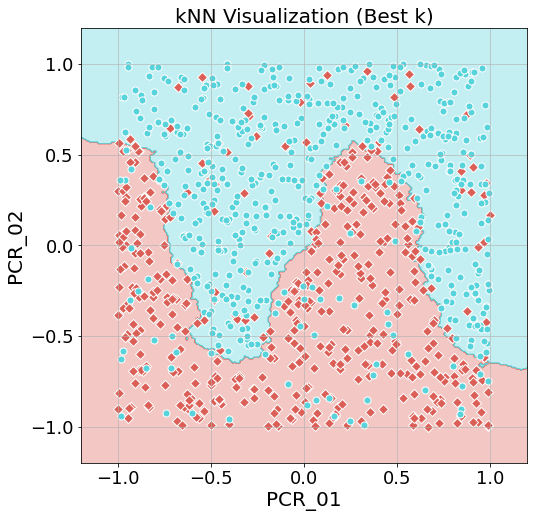

In [10]:
#@title Retrain a k-NN model, with the optimal k, on all the training samples:

kNN_opt = KNeighborsClassifier(n_neighbors=k_opt)
kNN_opt.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN_opt,
              X=train_mod_x,
              Y=train_mod_y,
              title="kNN Visualization (Best k)",
              xlabel="PCR_01",
              ylabel="PCR_02")

In [11]:
#@title Find the accuracy:

test_mod_x = test[["PCR_01", "PCR_02"]].copy()
test_mod_y = test["spread"].copy()
acc = kNN_opt.score(X=test_mod_x.values, y=test_mod_y.values)
print(f"Test accuracy is: {acc}")

Test accuracy is: 0.912


## Question 5

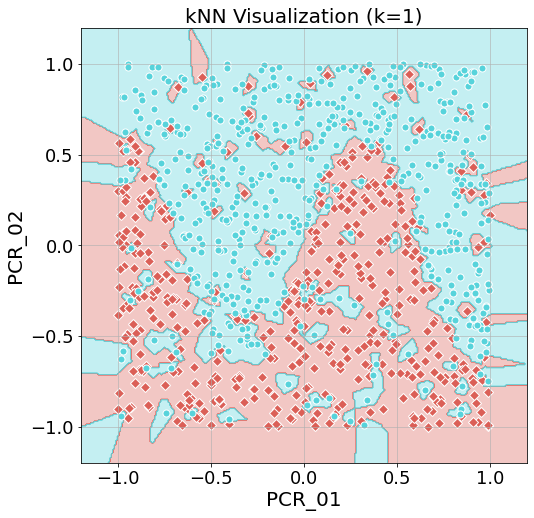

The training accuracy of the kNN model with k=1 is 1.0
The test accuarcy of the kNN model with k=1 is 0.832


In [12]:
#@title Train a kNN model with 𝑘 = 1:

kNN1 =  KNeighborsClassifier(n_neighbors=1)
kNN1.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN1,
              X=train_mod_x,
              Y=train_mod_y,
              title="kNN Visualization (k=1)",
              xlabel="PCR_01",
              ylabel="PCR_02")
train_acc = kNN1.score(X=train_mod_x.values, y=train_mod_y.values)
test_acc = kNN1.score(X=test_mod_x.values, y=test_mod_y.values)
print(f"The training accuracy of the kNN model with k=1 is {train_acc}")
print(f"The test accuarcy of the kNN model with k=1 is {test_acc}")

In [13]:
#@title Train a kNN model with *k* = 501:

kNN501 =  KNeighborsClassifier(n_neighbors=501)
kNN501.fit(X=train_mod_x.values, y=train_mod_y.values)
visualize_clf(clf=kNN501,
              X=train_mod_x,
              Y=train_mod_y,
              title="kNN Visualization (k=501)",
              xlabel="PCR_01",
              ylabel="PCR_02")
train_acc = kNN501.score(X=train_mod_x.values, y=train_mod_y.values)
test_acc = kNN501.score(X=test_mod_x.values, y=test_mod_y.values)
print(f"The training accuracy of the kNN model with k=1 is {train_acc}")
print(f"The test accuarcy of the kNN model with k=1 is {test_acc}")

The training accuracy of the kNN model with k=1 is 0.677
The test accuarcy of the kNN model with k=1 is 0.764


## Question 6

In [14]:
#@title Repeat cross-validation process for all the features:

train_x = train[train.columns.difference(['spread', 'risk'])]
train_spread_y = train["spread"]
cv_train_mean = np.array([])
cv_val_mean = np.array([])
for k in k_list:
    kNN_cv = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(estimator=kNN_cv, X=train_x, y=train_spread_y,
                                cv=8, return_train_score=True)
    cv_train_mean = np.append(cv_train_mean, np.array(cv_results['train_score']).mean())
    cv_val_mean = np.append(cv_val_mean, np.array(cv_results['test_score']).mean())

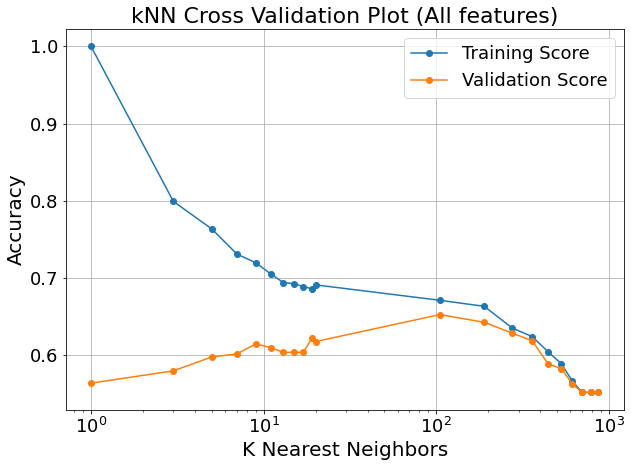

In [15]:
#@title plot a validation curve - of training and validation accuracies:

plt.figure(figsize=(10,7))
train_line = plt.semilogx(k_list,cv_train_mean, label="Training Score", marker='o')
val_line = plt.semilogx(k_list,cv_val_mean, label="Validation Score", marker='o')
plt.grid(visible=True)
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Cross Validation Plot (All features)")
plt.legend()
plt.show()

In [16]:
#@title Find the best *k*:

k_opt_idx = np.argmax(cv_val_mean)
k_opt = k_list[k_opt_idx]
print(f"The best k found in out cross validation is: {k_opt}")
print(f"The training accuracy with k={k_opt} is: {cv_train_mean[k_opt_idx]}")
print(f"The validation accuracy with k={k_opt} is: {cv_val_mean[k_opt_idx]}")

The best k found in out cross validation is: 105
The training accuracy with k=105 is: 0.6705714285714286
The validation accuracy with k=105 is: 0.652




---


---



---




# Part 2: Decision trees

## Question 7

In [17]:
#@title Train a model with `ID3` and `max_depth=4`:

from sklearn.tree import DecisionTreeClassifier, plot_tree
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
train_x = train[train.columns.difference(['spread', 'risk'])]
train_risk_y = train['risk']
dec_tree.fit(X=train_x, y=train_risk_y)
train_score = dec_tree.score(X=train_x, y=train_risk_y)
print(f"The training accuracy is: {train_score}")

The training accuracy is: 0.795


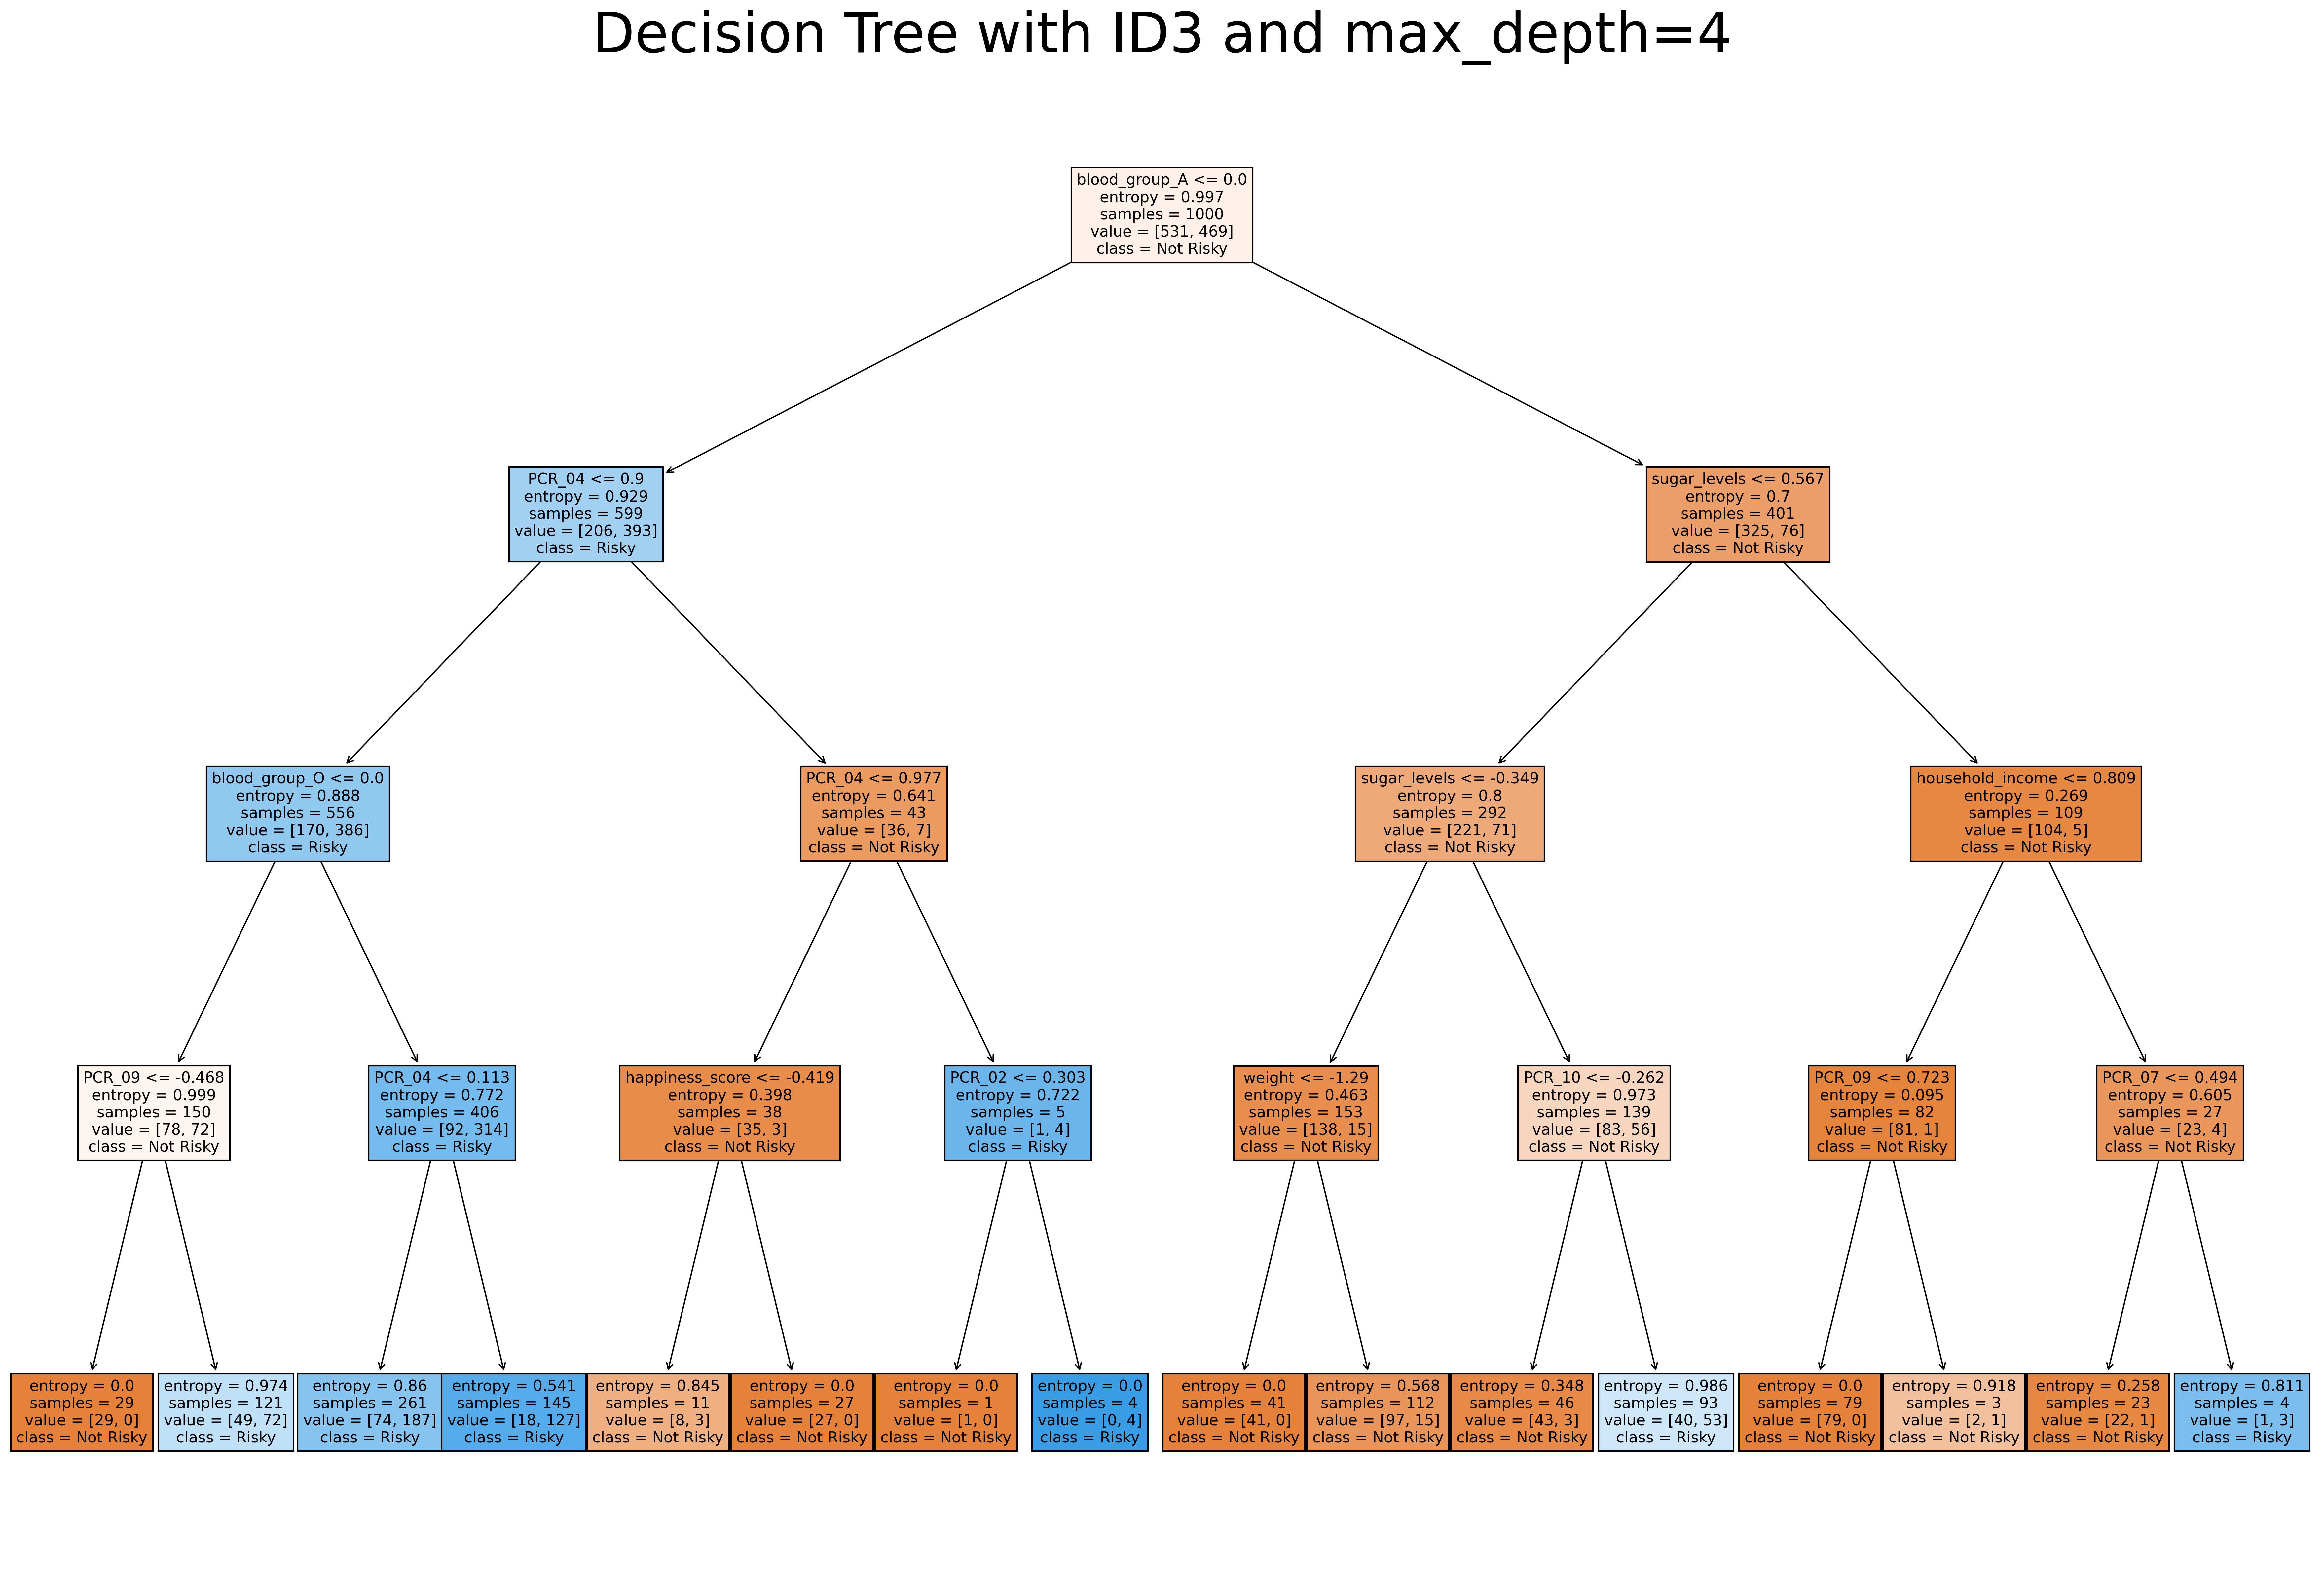

In [18]:
#@title Visualize the trained tree:

plt.figure(figsize=(30,20), dpi=300)
plot_tree(decision_tree=dec_tree,
          filled=True,
          feature_names=train.columns.difference(['spread', 'risk']),
          class_names=["Not Risky", "Risky"],
        fontsize=11)
plt.title("Decision Tree with ID3 and max_depth=4", size=40)
plt.show()

<h4>Explanation:</h4>

The `[l,r]` ***value*** tuple means how many samples there are with lable 'Not Risky' (=`l`) and many there are with lable 'Risky' (=`r`). 

The ***class*** means what is the class with the majority of samples in that node.

## Question 8

In [19]:
#@title Choose appropriate ranges for both hyperparameters and perform GridSearch:

from sklearn.model_selection import GridSearchCV

min_samples_list = list(range(10,24,2))
max_depth_list = list(range(6,13,1))
parameters = {'max_depth':max_depth_list, 'min_samples_leaf':min_samples_list}
dec_tree = DecisionTreeClassifier(criterion="entropy")
grid_search = GridSearchCV(estimator=dec_tree, param_grid=parameters,
                           cv=8,return_train_score=True)
grid_search.fit(X=train_x, y=train_risk_y);

In [20]:
#@title Get the score of the train and the validation, as matrices:

mean_train_score = grid_search.cv_results_["mean_train_score"].reshape(
    len(max_depth_list),len(min_samples_list))
mean_test_score = grid_search.cv_results_["mean_test_score"].reshape(
    len(max_depth_list),len(min_samples_list))

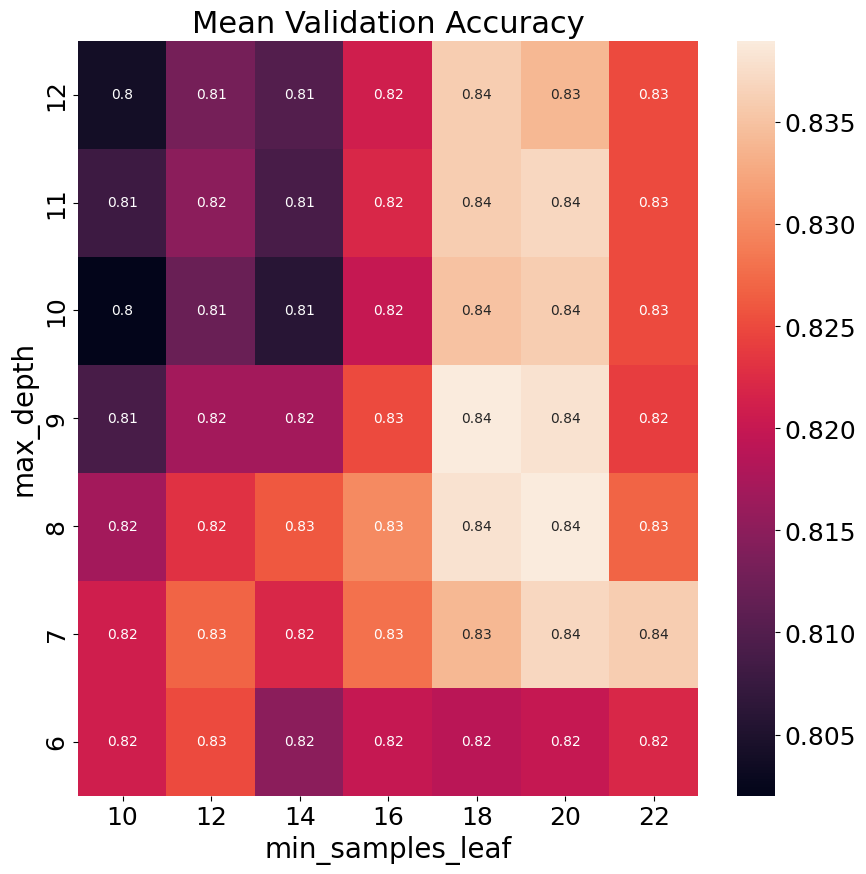

In [21]:
#@title Plot a heatmap for the cross-validated validation accuracy:

plt.figure(figsize=(10,10), dpi=100)
ax_test = sns.heatmap(mean_test_score,
                      annot=True,
                      xticklabels=min_samples_list,
                      yticklabels=max_depth_list)
ax_test.set(xlabel="min_samples_leaf", ylabel="max_depth")
ax_test.invert_yaxis()
ax_test.set_title("Mean Validation Accuracy");

Text(0.5, 1.0, 'Mean Training Accuracy')

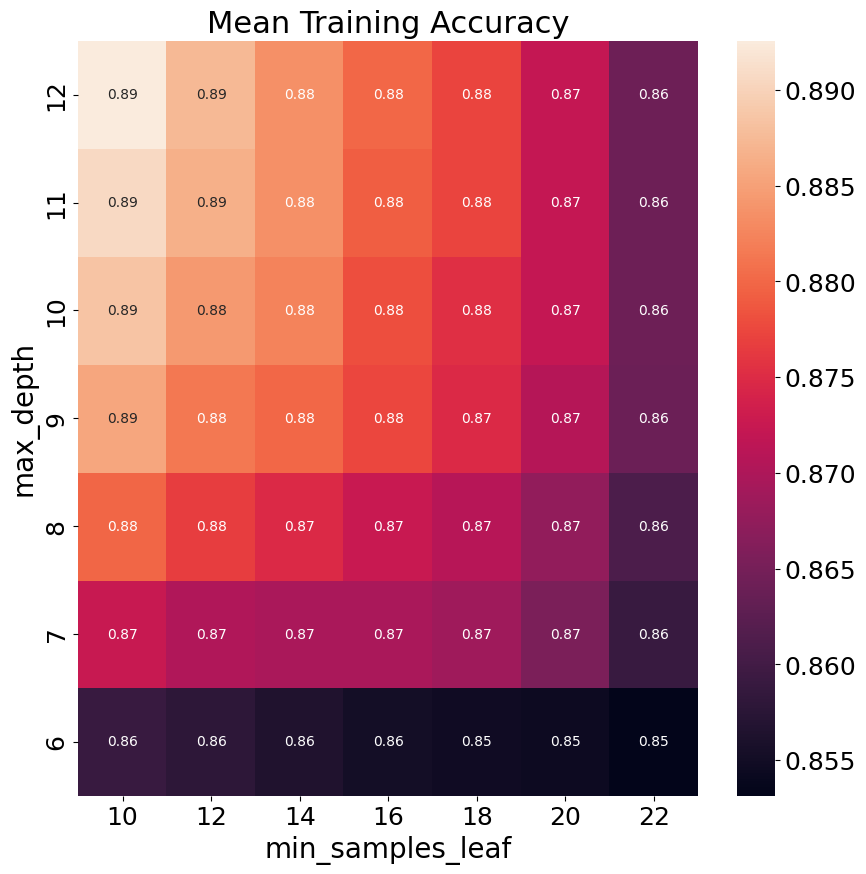

In [22]:
#@title Plot a heatmap for the cross-validated training accuracy:

plt.figure(figsize=(10,10), dpi=100)
ax_train = sns.heatmap(mean_train_score,
                       annot=True,
                       xticklabels=min_samples_list,
                       yticklabels=max_depth_list)
ax_train.set(xlabel="min_samples_leaf", ylabel="max_depth")
ax_train.invert_yaxis()
ax_train.set_title("Mean Training Accuracy")

In [23]:
#@title Find the optimal combibnation:

best_score, best_index = mean_test_score.max(), mean_test_score.argmax()
row_num, col_num = best_index // 7, best_index % 7
psudo_row_num = 7 - row_num - 1
max_depth_opt, min_samples_leaf_opt = max_depth_list[row_num], min_samples_list[col_num]
print(f"The optimal pair is in row {row_num} and column {col_num}.")
print(f"Since we invert the y axis, the pair is in row {psudo_row_num} and column {col_num}.")
print(f"The pair is: (max_depth, min_samples_leaf) = \
({max_depth_opt}, {min_samples_leaf_opt}).")

The optimal pair is in row 2 and column 5.
Since we invert the y axis, the pair is in row 4 and column 5.
The pair is: (max_depth, min_samples_leaf) = (8, 20).


## Question 9

In [24]:
#@title Retain a decision tree with the optimal hyperparameters combination:

"""
df_check = pd.DataFrame.from_dict(grid_search.cv_results_)
idx_max = df_check[["mean_test_score"]].idxmax().values[0]
params_opt = df_check[["params"]].iloc[[idx_max]].values[0][0]

max_depth_opt = params_opt["max_depth"]
min_samples_leaf_opt = params_opt["min_samples_leaf"]
"""

test_x = test[test.columns.difference(['spread', 'risk'])]
test_risk_y = test['risk']
dec_tree_opt = DecisionTreeClassifier(criterion="entropy",
                                      max_depth=max_depth_opt,
                                      min_samples_leaf=min_samples_leaf_opt)
dec_tree_opt.fit(X=train_x, y=train_risk_y)
score = dec_tree_opt.score(X=test_x, y=test_risk_y)
print(f"The accuracy on the test of the decision tree with max_depth={max_depth_opt} and \
min_samples_leaf={min_samples_leaf_opt} is: {score}.")

The accuracy on the test of the decision tree with max_depth=8 and min_samples_leaf=20 is: 0.88.




---



---



---



# Part 3: Linear SVM and the Polynomial kernel

In [116]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np


class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """

    def __init__(self, C: float, lr: float = 1e-5, batch_size=32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w: np.ndarray, b: float, C: float, X: np.ndarray, y: np.ndarray) -> float:
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        # TODO: complete the loss calculation
        hinge_loss = np.maximum(0, 1 - hinge_inputs)
        return np.power(np.linalg.norm(w), 2) + C * np.sum(hinge_loss)

    @staticmethod
    def __func_z(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Auxiliary private method to calculate f(z).
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        z = np.multiply(margins, y.reshape(-1, 1))
        return np.where(z < 1, -1, 0)

    @staticmethod
    def subgradient(w: np.ndarray, b: float, C: float, X: np.ndarray, y: np.ndarray) -> tuple:
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        func_z_vector = SoftSVM.__func_z(w, b, X, y)
        func_z_y = np.multiply(func_z_vector, y.reshape(-1, 1))
        g_w = np.multiply(2, w) + np.multiply(C, X.T.dot(func_z_y).reshape(-1))
        g_b = C * np.sum(func_z_y)
        return g_w, g_b

    def fit_with_logs(self, X: np.ndarray, y: np.ndarray, max_iter: int = 2000, keep_losses: bool = True) -> tuple:
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - (self.lr * g_w)
            self.b = self.b - (self.lr * g_b)

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X: np.ndarray, y: np.ndarray, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X: np.ndarray):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        margins = (X.dot(self.w) + self.b).reshape(-1, 1)
        return np.sign(margins) + (margins == 0)


In [117]:
#@title Definition of verify_gradients:

def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    import numpy as np

    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    import numpy as np
    import matplotlib.pyplot as plt

    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


## Question 10

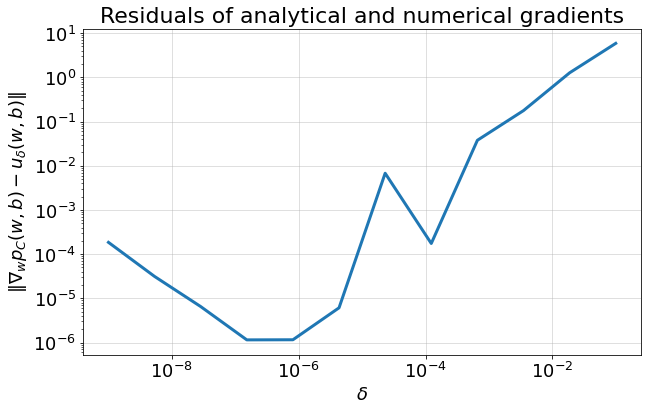

In [118]:
#@title Generate a plot that compares the numerical gradients to the analytic gradients:

# from SoftSVM import SoftSVM
# from verify_gradients import compare_gradients

train_mod_x = train_mod[["PCR_01", "PCR_02"]].to_numpy()
train_mod_y = train_mod["spread"].to_numpy()
test_mod_x = test_mod[["PCR_01", "PCR_02"]].to_numpy()
test_mod_y = test_mod["spread"].to_numpy()

compare_gradients(train_mod_x, train_mod_y, deltas=np.logspace(-9, -1, 12))

## Question 11

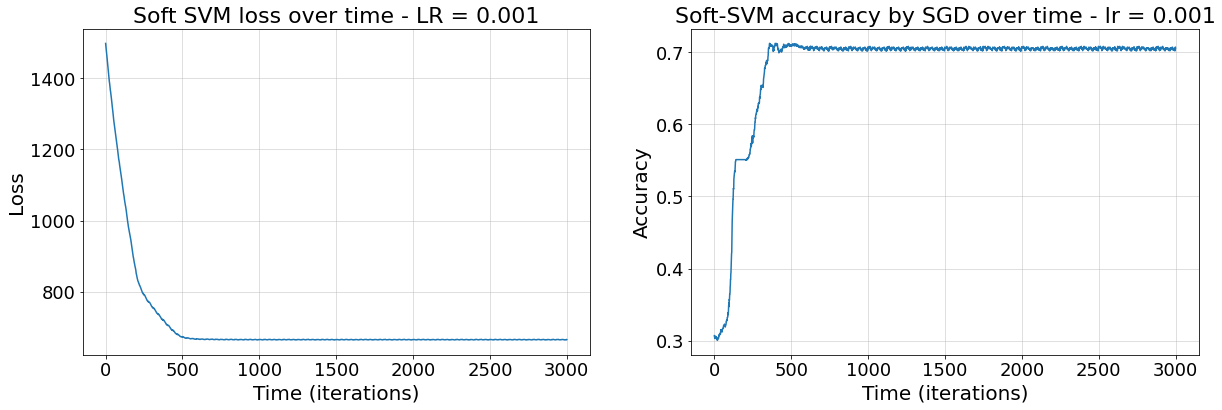

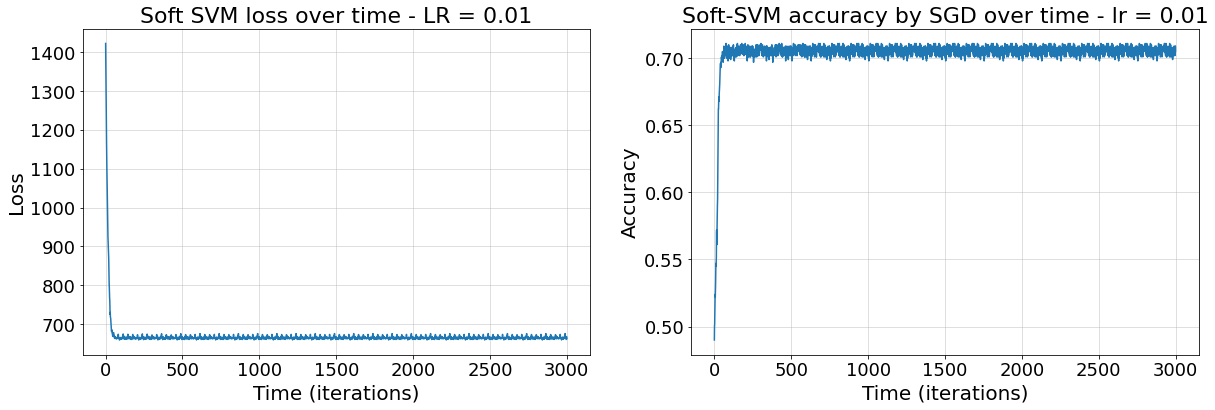

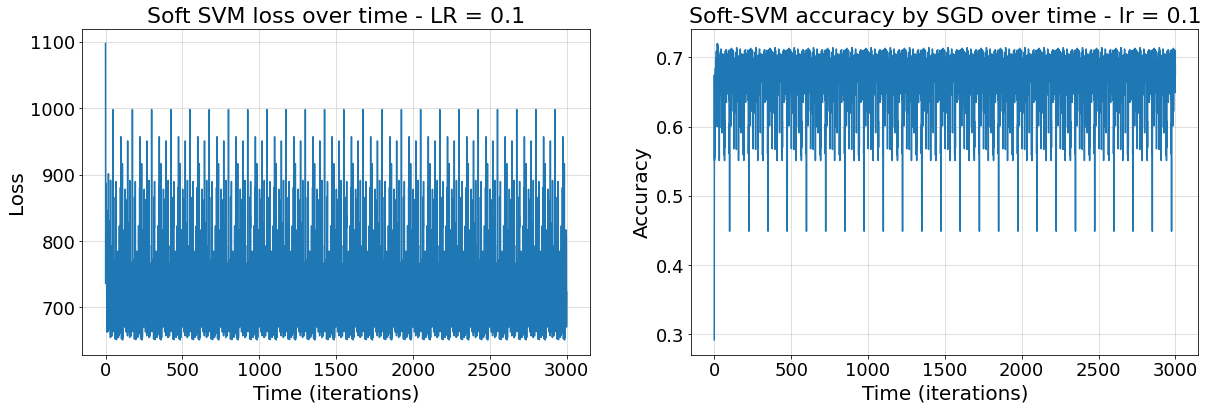

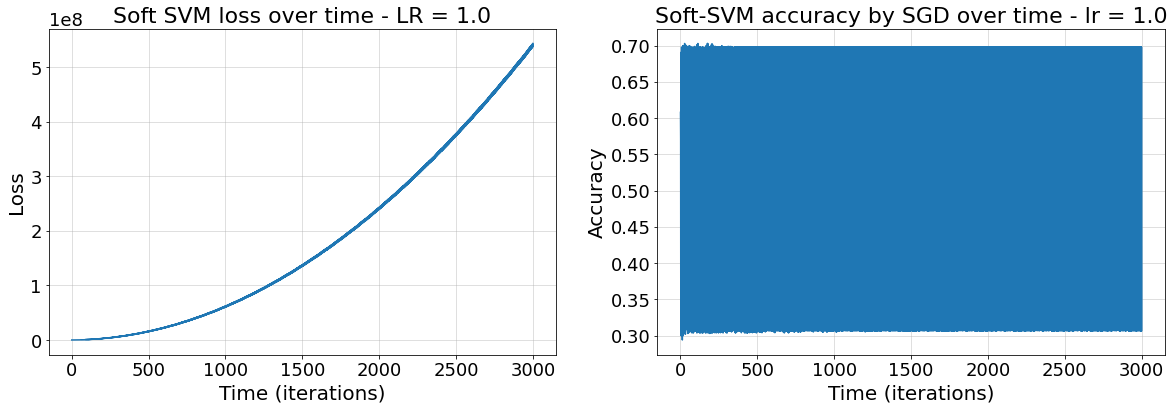

In [124]:
#@title Plot the graphs for the learning rates in np.logspace(-3, 0, 4):

for lr in np.logspace(-3, 0, 4):
  clf = SoftSVM(C=1, lr=lr)
  losses, accuracies = clf.fit_with_logs(train_mod_x, train_mod_y, max_iter=3000)
  plt.figure(figsize=(20, 6))
  plt.subplot(121), plt.grid(alpha=0.5), plt.title (f"Soft SVM loss over time - LR = {lr}")
  plt.plot(losses), plt.xlabel("Time (iterations)"), plt.ylabel("Loss")
  plt.subplot(122), plt.grid(alpha=0.5), plt.title (f"Soft-SVM accuracy by SGD over time - lr = {lr}")
  plt.plot(accuracies), plt.xlabel("Time (iterations)"), plt.ylabel("Accuracy")

Denote that we set C = 1 because for lower C values we get that the accuracy is not optimal for the last iterations.

As we can see, we converge the best(fastest) for `lr = 0.01`. Also the best accuracy is for 0.001 and 0.01.




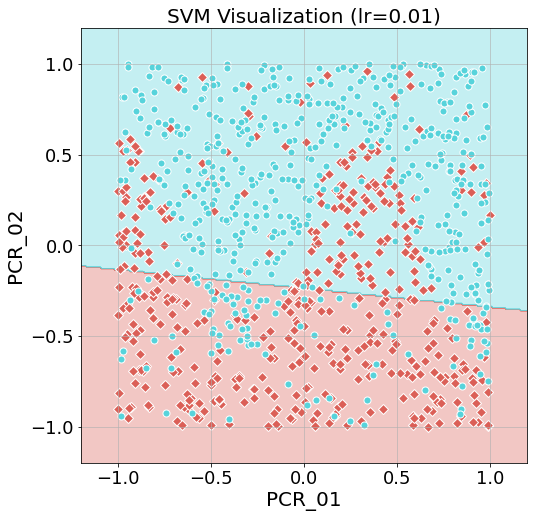

The maximum accuracy is 0.721 on step 31
The minimum loss is 658.2196910773439 on step 1556


In [123]:
#@title Train this linear model with the chosen LR and plot its decision regions:

opt_lr = 0.01
svm = SoftSVM(C=1, lr=opt_lr)
losses, accuracies = svm.fit_with_logs(X=train_mod_x, y=train_mod_y)
visualize_clf(clf=svm,
              X=train_mod_x,
              Y=train_mod_y,
              title=f"SVM Visualization (lr={opt_lr})",
              xlabel="PCR_01",
              ylabel="PCR_02")

min_loss_idx = np.argmin(losses)
max_acc_idx = np.argmax(accuracies)
print(f"The maximum accuracy is {accuracies[max_acc_idx]} on step {max_acc_idx}")
print(f"The minimum loss is {losses[min_loss_idx]} on step {min_loss_idx}")

As we can see, the maximum accuracy is 0.721 on step 31.
The minimum loss is 658.2196910773439 on step 1556.

`Need to explain why`.

## Qeustion 12




In [ ]:
C = 1e13
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
svm_clf_deg_2 = Pipeline([('feature_mapping', PolynomialFeatures(degree=2)),
                    ('scaler', StandardScaler()),
                    ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])

svm_clf_deg_3 = Pipeline([('feature_mapping', PolynomialFeatures(degree=3)),
                    ('scaler', StandardScaler()),
                    ('SVM', SoftSVM(C=C, lr=(1/(C*5e2))))])

svm_clf_deg_2.fit(train_mod_x, train_mod_y, SVM__max_iter=10000)
svm_clf_deg_3.fit(train_mod_x, train_mod_y, SVM__max_iter=10000)

In [ ]:
deg_2_train_acc = svm_clf_deg_2.score(X=train_mod_x, y=train_mod_y)
deg_2_test_acc = svm_clf_deg_2.score(X=test_mod_x, y=test_mod_y)
deg_3_train_acc = svm_clf_deg_3.score(X=train_mod_x, y=train_mod_y)
deg_3_test_acc = svm_clf_deg_3.score(X=test_mod_x, y=test_mod_y)

print(f"Using 2nd dgree polynomial feature mapping, we get a training accuracy of {deg_2_train_acc} and a test accuracy of {deg_2_test_acc}")
print(f"Using 3nd dgree polynomial feature mapping, we get a training accuracy of {deg_3_train_acc} and a test accuracy of {deg_3_test_acc}")